In [2]:
#NLP model for sabic WO notes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#using an excel file I made while at SABIC with lots of PM info, everything except the notes about the work that was done 
#we will pretend the notes column that I used while working on this at sabic are the WO notes

In [5]:
excel = "C:\\Users\\brian\\Documents\\Data Sabic\\PM_OP_example.xlsx"

In [6]:
df = pd.read_excel(excel)

In [7]:
pd.options.display.float_format = '{:20.0f}'.format

In [8]:
df.head()

,MaintenancePlan,MaintItem text,Cycle,Unit,ABC,Notes,Sched.StartDate,Equipment,Sort field,Functional Loc.,Work center,Last order
0,BL1000001830,SITE WIDE CHAINFALL INSPECTION,3,MON,E,no action,2019-03-11 00:00:00,NaN,NaN,BL00-00-STC01,MTCE-01,9301201868
1,BL1000001831,SITE WIDE LEVER HOIST INSPECTION,3,MON,E,no action,2019-03-11 00:00:00,NaN,NaN,BL00-00-STC01,MTCE-01,9301201869
2,BL1000001899,SAN CALDWELL SLINGS INSPECTION,13,WK,E,no action,2019-03-11 00:00:00,NaN,NaN,BL00-00-STC01,MTCE-01,9301273289
3,BL1000001863,FIREALARM ZONE # 19 AUDIBLE ALARM &,19,WK,E,no action,2019-03-11 00:00:00,NaN,NaN,BL00-00-STC01-HSM01-FFS01,MTCE-01,9301226447
4,BL1000001233,"LN1, 2 VENTILATION FANS ROOF TOP EXHAUST",26,WK,E,delete,2019-03-11 00:00:00,NaN,NaN,BL62-01-AUX00-UTY01,MTCE-01,9301273172


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 12 columns):
MaintenancePlan    2005 non-null object
MaintItem text     2005 non-null object
Cycle              2000 non-null float64
Unit               2000 non-null object
ABC                2004 non-null object
Notes              1796 non-null object
Sched.StartDate    2005 non-null object
Equipment          1581 non-null object
Sort field         1581 non-null object
Functional Loc.    2001 non-null object
Work center        2005 non-null object
Last order         1835 non-null float64
dtypes: float64(2), object(10)
memory usage: 188.1+ KB


In [10]:
df['Sort field'].fillna(value='0 NA',inplace=True)

In [11]:
df['Equipment'].fillna(value='NA',inplace=True)

In [12]:
df['MaintenancePlan'].fillna(value='NA',inplace=True)

In [13]:
df['MaintItem text'].fillna(value='NA',inplace=True)

In [14]:
df['Cycle'].fillna(value=0,inplace=True)

In [15]:
df['Unit'].fillna(value='NA',inplace=True)

In [16]:
df['ABC'].fillna(value='NA',inplace=True)

In [17]:
df['Notes'].fillna(value='None',inplace=True)

In [18]:
df['Sched.StartDate'].fillna(value='NA',inplace=True)

In [19]:
df.iloc[363]

MaintenancePlan                     NA
MaintItem text                      NA
Cycle                                0
Unit                                NA
ABC                                 NA
Notes                             None
Sched.StartDate                     NA
Equipment                           NA
Sort field                        0 NA
Functional Loc.                    NaN
Work center                        NaN
Last order                         NaN
Name: 363, dtype: object

In [20]:
df.drop(363,inplace=True)

In [21]:
df['Functional Loc.'].fillna(value='NA',inplace=True)

In [22]:
df['Last order'].fillna(value=0,inplace=True)

In [23]:
df.isnull().any(axis=0)

MaintenancePlan    False
MaintItem text     False
Cycle              False
Unit               False
ABC                False
Notes              False
Sched.StartDate    False
Equipment          False
Sort field         False
Functional Loc.    False
Work center        False
Last order         False
dtype: bool

In [24]:
df[1:15]

,MaintenancePlan,MaintItem text,Cycle,Unit,ABC,Notes,Sched.StartDate,Equipment,Sort field,Functional Loc.,Work center,Last order
1,BL1000001831,SITE WIDE LEVER HOIST INSPECTION,3,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301201869
2,BL1000001899,SAN CALDWELL SLINGS INSPECTION,13,WK,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301273289
3,BL1000001863,FIREALARM ZONE # 19 AUDIBLE ALARM &,19,WK,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01-HSM01-FFS01,MTCE-01,9301226447
4,BL1000001233,"LN1, 2 VENTILATION FANS ROOF TOP EXHAUST",26,WK,E,delete,2019-03-11 00:00:00,NA,0 NA,BL62-01-AUX00-UTY01,MTCE-01,9301273172
5,BL1000001314,LN5 MOTOR BEARING LUBRICATION REF MMIP,6,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL62-01-SAN05,MTCE-01,9301273178
6,BL1000000064,FIRE WATER DIESEL PUMP WEEKLY PM,1,WK,A,no action,2019-03-11 00:00:00,BL000000004-09-109,004-09-109 SAN F H20 DS,BL00-00-STC01-HSM01-FFS01,MTCE-01,9301323301
7,BL1000000084,"COOLING TOWER PACKAGE LN 3, 4 & 5",26,WK,B,no action,2019-03-11 00:00:00,BL000000005-07-401,005-07-401 ABS/SAN CLNG,BL62-01-AUX00-UTY01-CTW01,MTCE-01,9301272951
8,BL1000000083,PH & CONDUCTIVITY MONTHLY PM,4,WK,C,no action,2019-03-11 00:00:00,BL000000005-07-402,005-07-402 CO COOLING TWR,BL62-01-AUX00-UTY01-CTW01,MTCE-01,9301272949
9,BL1000001905,BLOWERS EXHAUST FAN MAINTENANCE ROOF,26,WK,C,Delete,2019-03-11 00:00:00,BL00000000SITE-023,SITE-023 ROTATNG EQP SI,BL00-00-STC01-MTE01,MTCE-01,9301273291
10,BL1000001751,BREATHING AIR FILTER/MONITOR,4,WK,C,delete,2019-03-11 00:00:00,BL000000020-33-071,020-33-071 BREATHING AI,BL00-00-STC01-MTE01,MTCE-01,9301273266


In [25]:
df['Tech ID'] = df['Sort field'].apply(lambda x: x.split()[0])

In [26]:
df['Equip Descrip'] = df['Sort field'].apply(lambda x: ' '.join(x.split()[1:]))

In [27]:
df[5:15]

,MaintenancePlan,MaintItem text,Cycle,Unit,ABC,Notes,Sched.StartDate,Equipment,Sort field,Functional Loc.,Work center,Last order,Tech ID,Equip Descrip
5,BL1000001314,LN5 MOTOR BEARING LUBRICATION REF MMIP,6,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL62-01-SAN05,MTCE-01,9301273178,0,NA
6,BL1000000064,FIRE WATER DIESEL PUMP WEEKLY PM,1,WK,A,no action,2019-03-11 00:00:00,BL000000004-09-109,004-09-109 SAN F H20 DS,BL00-00-STC01-HSM01-FFS01,MTCE-01,9301323301,004-09-109,SAN F H20 DS
7,BL1000000084,"COOLING TOWER PACKAGE LN 3, 4 & 5",26,WK,B,no action,2019-03-11 00:00:00,BL000000005-07-401,005-07-401 ABS/SAN CLNG,BL62-01-AUX00-UTY01-CTW01,MTCE-01,9301272951,005-07-401,ABS/SAN CLNG
8,BL1000000083,PH & CONDUCTIVITY MONTHLY PM,4,WK,C,no action,2019-03-11 00:00:00,BL000000005-07-402,005-07-402 CO COOLING TWR,BL62-01-AUX00-UTY01-CTW01,MTCE-01,9301272949,005-07-402,CO COOLING TWR
9,BL1000001905,BLOWERS EXHAUST FAN MAINTENANCE ROOF,26,WK,C,Delete,2019-03-11 00:00:00,BL00000000SITE-023,SITE-023 ROTATNG EQP SI,BL00-00-STC01-MTE01,MTCE-01,9301273291,SITE-023,ROTATNG EQP SI
10,BL1000001751,BREATHING AIR FILTER/MONITOR,4,WK,C,delete,2019-03-11 00:00:00,BL000000020-33-071,020-33-071 BREATHING AI,BL00-00-STC01-MTE01,MTCE-01,9301273266,020-33-071,BREATHING AI
11,BL1000001753,"TRACTOR, MAINTENANCE UTILITY",4,WK,C,six months,2019-03-11 00:00:00,BL000000020-53-018,020-53-018 UTLTY TRACTO,BL00-00-STC01-VEH01,MTCE-01,9301273268,020-53-018,UTLTY TRACTO
12,BL1000001777,TRACKMOBILE RENTAL WEEKLY PM FILE #3397,1,WK,C,monthly,2019-03-11 00:00:00,BL000000020-53-113,020-53-113 TRCKMBL RENT,BL00-00-STC01-VEH01,MTCE-01,9301323712,020-53-113,TRCKMBL RENT
13,BL1000001779,HERCULES TRACKMOBILE - 020-53-114,1,WK,C,monthly,2019-03-11 00:00:00,BL000000020-53-114,020-53-114 TRCKMBLHERCU,BL00-00-STC01-VEH01,MTCE-01,9301323713,020-53-114,TRCKMBLHERCU
14,BL1000000318,VAT HP-5890II GAS CHROMAT - SAN LAB,1,WK,C,no action,2019-03-11 00:00:00,BL000000022-18-066,022-18-066 CHROMATOGRAP,BL62-01-AUX00-LAB01,MTCE-01,9301323400,022-18-066,CHROMATOGRAP


In [28]:
df[(df['Tech ID'] == '0') & (df['Equipment'] != 'NA')]

,MaintenancePlan,MaintItem text,Cycle,Unit,ABC,Notes,Sched.StartDate,Equipment,Sort field,Functional Loc.,Work center,Last order,Tech ID,Equip Descrip


In [29]:
df.rename(columns = {'Equipment':'Equip Num'}, inplace = True) 

In [30]:
df.head()

,MaintenancePlan,MaintItem text,Cycle,Unit,ABC,Notes,Sched.StartDate,Equip Num,Sort field,Functional Loc.,Work center,Last order,Tech ID,Equip Descrip
0,BL1000001830,SITE WIDE CHAINFALL INSPECTION,3,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301201868,0,NA
1,BL1000001831,SITE WIDE LEVER HOIST INSPECTION,3,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301201869,0,NA
2,BL1000001899,SAN CALDWELL SLINGS INSPECTION,13,WK,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301273289,0,NA
3,BL1000001863,FIREALARM ZONE # 19 AUDIBLE ALARM &,19,WK,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01-HSM01-FFS01,MTCE-01,9301226447,0,NA
4,BL1000001233,"LN1, 2 VENTILATION FANS ROOF TOP EXHAUST",26,WK,E,delete,2019-03-11 00:00:00,NA,0 NA,BL62-01-AUX00-UTY01,MTCE-01,9301273172,0,NA


In [31]:
df['Notes length'] = df['Notes'].apply(len)

In [32]:
df.head()

,MaintenancePlan,MaintItem text,Cycle,Unit,ABC,Notes,Sched.StartDate,Equip Num,Sort field,Functional Loc.,Work center,Last order,Tech ID,Equip Descrip,Notes length
0,BL1000001830,SITE WIDE CHAINFALL INSPECTION,3,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301201868,0,NA,9
1,BL1000001831,SITE WIDE LEVER HOIST INSPECTION,3,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301201869,0,NA,9
2,BL1000001899,SAN CALDWELL SLINGS INSPECTION,13,WK,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301273289,0,NA,9
3,BL1000001863,FIREALARM ZONE # 19 AUDIBLE ALARM &,19,WK,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01-HSM01-FFS01,MTCE-01,9301226447,0,NA,9
4,BL1000001233,"LN1, 2 VENTILATION FANS ROOF TOP EXHAUST",26,WK,E,delete,2019-03-11 00:00:00,NA,0 NA,BL62-01-AUX00-UTY01,MTCE-01,9301273172,0,NA,6


In [1]:
df.head()

NameError: name 'df' is not defined

In [34]:
df['Cycle'][0]

3.0

In [35]:
def mon(x):
    cycle = x[0]
    unit = x[1]
    
    if unit == 'MON':
        
        if cycle == 1:
            return 4
        else:
            return (cycle/12)*52
    elif unit == 'YR':
        return cycle*52
    else:
        return cycle
        

In [36]:
df['Cycle WK'] = df[['Cycle','Unit']].apply(mon,axis=1)

In [37]:
df[0:15]

,MaintenancePlan,MaintItem text,Cycle,Unit,ABC,Notes,Sched.StartDate,Equip Num,Sort field,Functional Loc.,Work center,Last order,Tech ID,Equip Descrip,Notes length,Cycle WK
0,BL1000001830,SITE WIDE CHAINFALL INSPECTION,3,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301201868,0,NA,9,13
1,BL1000001831,SITE WIDE LEVER HOIST INSPECTION,3,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301201869,0,NA,9,13
2,BL1000001899,SAN CALDWELL SLINGS INSPECTION,13,WK,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301273289,0,NA,9,13
3,BL1000001863,FIREALARM ZONE # 19 AUDIBLE ALARM &,19,WK,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01-HSM01-FFS01,MTCE-01,9301226447,0,NA,9,19
4,BL1000001233,"LN1, 2 VENTILATION FANS ROOF TOP EXHAUST",26,WK,E,delete,2019-03-11 00:00:00,NA,0 NA,BL62-01-AUX00-UTY01,MTCE-01,9301273172,0,NA,6,26
5,BL1000001314,LN5 MOTOR BEARING LUBRICATION REF MMIP,6,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL62-01-SAN05,MTCE-01,9301273178,0,NA,9,26
6,BL1000000064,FIRE WATER DIESEL PUMP WEEKLY PM,1,WK,A,no action,2019-03-11 00:00:00,BL000000004-09-109,004-09-109 SAN F H20 DS,BL00-00-STC01-HSM01-FFS01,MTCE-01,9301323301,004-09-109,SAN F H20 DS,9,1
7,BL1000000084,"COOLING TOWER PACKAGE LN 3, 4 & 5",26,WK,B,no action,2019-03-11 00:00:00,BL000000005-07-401,005-07-401 ABS/SAN CLNG,BL62-01-AUX00-UTY01-CTW01,MTCE-01,9301272951,005-07-401,ABS/SAN CLNG,9,26
8,BL1000000083,PH & CONDUCTIVITY MONTHLY PM,4,WK,C,no action,2019-03-11 00:00:00,BL000000005-07-402,005-07-402 CO COOLING TWR,BL62-01-AUX00-UTY01-CTW01,MTCE-01,9301272949,005-07-402,CO COOLING TWR,9,4
9,BL1000001905,BLOWERS EXHAUST FAN MAINTENANCE ROOF,26,WK,C,Delete,2019-03-11 00:00:00,BL00000000SITE-023,SITE-023 ROTATNG EQP SI,BL00-00-STC01-MTE01,MTCE-01,9301273291,SITE-023,ROTATNG EQP SI,6,26


In [38]:
df.corr()

,Cycle,Last order,Notes length,Cycle WK
Cycle,1,-0,-0,1
Last order,-0,1,0,-0
Notes length,-0,0,1,-0
Cycle WK,1,-0,-0,1


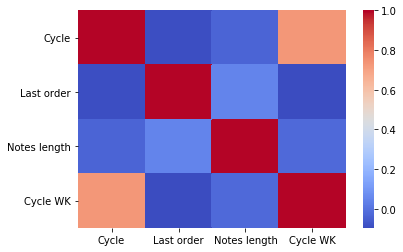

In [39]:
sns.heatmap(df.corr(),cmap='coolwarm')

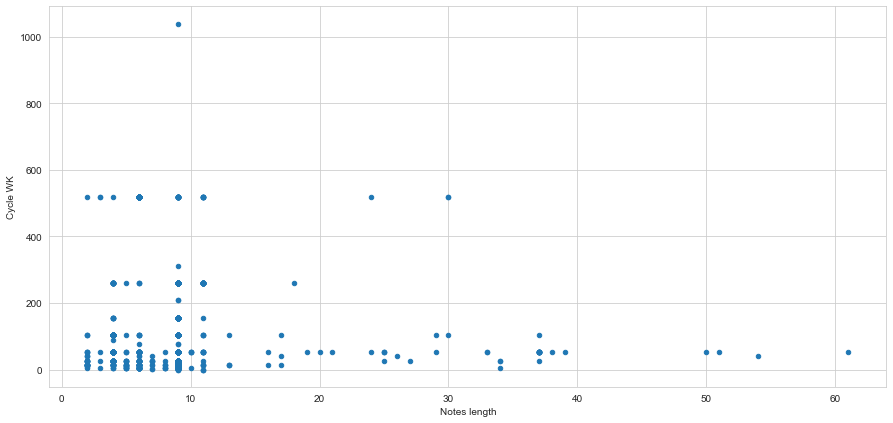

In [40]:
sns.set_style('whitegrid')
df.plot.scatter(x='Notes length',y='Cycle WK',figsize=(15,7))

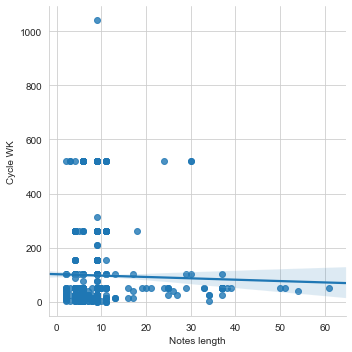

In [41]:
sns.lmplot(x='Notes length',y='Cycle WK',data=df)

In [45]:
df[0:15]

,MaintenancePlan,MaintItem text,Cycle,Unit,ABC,Notes,Sched.StartDate,Equip Num,Sort field,Functional Loc.,Work center,Last order,Tech ID,Equip Descrip,Notes length,Cycle WK,Notes split
0,BL1000001830,SITE WIDE CHAINFALL INSPECTION,3,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301201868,0,NA,9,13,"[no, action]"
1,BL1000001831,SITE WIDE LEVER HOIST INSPECTION,3,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301201869,0,NA,9,13,"[no, action]"
2,BL1000001899,SAN CALDWELL SLINGS INSPECTION,13,WK,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01,MTCE-01,9301273289,0,NA,9,13,"[no, action]"
3,BL1000001863,FIREALARM ZONE # 19 AUDIBLE ALARM &,19,WK,E,no action,2019-03-11 00:00:00,NA,0 NA,BL00-00-STC01-HSM01-FFS01,MTCE-01,9301226447,0,NA,9,19,"[no, action]"
4,BL1000001233,"LN1, 2 VENTILATION FANS ROOF TOP EXHAUST",26,WK,E,delete,2019-03-11 00:00:00,NA,0 NA,BL62-01-AUX00-UTY01,MTCE-01,9301273172,0,NA,6,26,[delete]
5,BL1000001314,LN5 MOTOR BEARING LUBRICATION REF MMIP,6,MON,E,no action,2019-03-11 00:00:00,NA,0 NA,BL62-01-SAN05,MTCE-01,9301273178,0,NA,9,26,"[no, action]"
6,BL1000000064,FIRE WATER DIESEL PUMP WEEKLY PM,1,WK,A,no action,2019-03-11 00:00:00,BL000000004-09-109,004-09-109 SAN F H20 DS,BL00-00-STC01-HSM01-FFS01,MTCE-01,9301323301,004-09-109,SAN F H20 DS,9,1,"[no, action]"
7,BL1000000084,"COOLING TOWER PACKAGE LN 3, 4 & 5",26,WK,B,no action,2019-03-11 00:00:00,BL000000005-07-401,005-07-401 ABS/SAN CLNG,BL62-01-AUX00-UTY01-CTW01,MTCE-01,9301272951,005-07-401,ABS/SAN CLNG,9,26,"[no, action]"
8,BL1000000083,PH & CONDUCTIVITY MONTHLY PM,4,WK,C,no action,2019-03-11 00:00:00,BL000000005-07-402,005-07-402 CO COOLING TWR,BL62-01-AUX00-UTY01-CTW01,MTCE-01,9301272949,005-07-402,CO COOLING TWR,9,4,"[no, action]"
9,BL1000001905,BLOWERS EXHAUST FAN MAINTENANCE ROOF,26,WK,C,Delete,2019-03-11 00:00:00,BL00000000SITE-023,SITE-023 ROTATNG EQP SI,BL00-00-STC01-MTE01,MTCE-01,9301273291,SITE-023,ROTATNG EQP SI,6,26,[Delete]


In [43]:
df['Notes split'] = df['Notes'].apply(lambda x: x.split())

In [44]:
df[df['Notes split'].isnull() == True]

,MaintenancePlan,MaintItem text,Cycle,Unit,ABC,Notes,Sched.StartDate,Equip Num,Sort field,Functional Loc.,Work center,Last order,Tech ID,Equip Descrip,Notes length,Cycle WK,Notes split


In [ ]:
df[(df['Tech ID'] == '0') & (df['Equipment'] != 'NA')]

In [54]:
df[(df.duplicated(['Equip Num']) == True) & (df['Equip Num'] != 'NA')]

,MaintenancePlan,MaintItem text,Cycle,Unit,ABC,Notes,Sched.StartDate,Equip Num,Sort field,Functional Loc.,Work center,Last order,Tech ID,Equip Descrip,Notes length,Cycle WK,Notes split
38,BL1000000416,LN 1 & 2 HI VAC BELTS,26,WK,B,annual,2019-03-12 00:00:00,BL000000101-10-027,101-10-027 LN1/2 IND VA,BL62-01-BAB00-PRO01,MTCE-01,9301226145,101-10-027,LN1/2 IND VA,7,26,[annual]
44,500000679340,PH Conductivity Weekly PM,1,WK,C,no action,2019-03-13 00:00:00,BL000000005-07-402,005-07-402 CO COOLING TWR,BL62-01-AUX00-UTY01-CTW01,MTCE-01,9301323060,005-07-402,CO COOLING TWR,9,1,"[no, action]"
46,BL1000001573,VAT BD AIR KNIFE; QUARTERLY OPS CHECHECK,13,WK,C,no action,2019-03-13 00:00:00,BL000000154-12-167,154-12-167 BD AIR KNIFE,BL99-61-FIN01-FIN04-STP01,MTCE-01,9301226369,154-12-167,BD AIR KNIFE,9,13,"[no, action]"
73,BL1000001199,OXYGEN ANALYZER - SAN CALIBRATION,4,WK,C,no action,2019-03-18 00:00:00,BL0000000000CO-010,CO-010 LABS ABS/SAN,BL62-01-AUX00-LAB01,MTCE-01,9301273164,CO-010,LABS ABS/SAN,9,4,"[no, action]"
74,BL1000000063,PERFORM INSTRUMENTATION FUNCTION,52,WK,A,no action,2019-03-18 00:00:00,BL000000004-09-109,004-09-109 SAN F H20 DS,BL00-00-STC01-HSM01-FFS01,MTCE-01,9301272943,004-09-109,SAN F H20 DS,9,52,"[no, action]"
84,BL1000001778,TRACKMOBILE- RENTAL - 020-53-113,4,WK,C,no action,2019-03-18 00:00:00,BL000000020-53-113,020-53-113 TRCKMBL RENT,BL00-00-STC01-VEH01,MTCE-01,9301300159,020-53-113,TRCKMBL RENT,9,4,"[no, action]"
87,BL1000000414,VAT HI VAC 875P - 101-10-027 LN1 & 2 IND,1,MON,B,no action,2019-03-18 00:00:00,BL000000101-10-027,101-10-027 LN1/2 IND VA,BL62-01-BAB00-PRO01,MTCE-01,9301299886,101-10-027,LN1/2 IND VA,9,4,"[no, action]"
88,BL1000000466,STNDBY PEROXIDE GENERATOR CAUTION EQPMNT,4,WK,C,delete,2019-03-18 00:00:00,BL000000101-12-025,101-12-025 PO2 STANDBY,BL62-01-BAB00-STG01-STG02,MTCE-01,9301299888,101-12-025,PO2 STANDBY,6,4,[delete]
94,BL1000001469,PPC BUILDING 3RD FLOOR LIGHTING,4,WK,C,delete,2019-03-18 00:00:00,BL000000150-24-150,150-24-150 COMPOUNDING,BL99-61-FIN01-BLD01,MTCE-01,9301300077,150-24-150,COMPOUNDING,6,4,[delete]
95,dBL1000001470,PPC BUILDING 2ND FLOOR (MEZ) LIGHTING,4,WK,C,delete,2019-03-18 00:00:00,BL000000150-24-150,150-24-150 COMPOUNDING,BL99-61-FIN01-BLD01,MTCE-01,9301300078,150-24-150,COMPOUNDING,6,4,[delete]


BL1000001349    1
500000666936    1
BL1000001851    1
BL1000000236    1
BL1000001194    1
500000770529    1
BL1000001373    1
500000770555    1
BL1000001399    1
BL1000001881    1
BL1000001396    1
BL1000001585    1
BL1000000513    1
BL1000001437    1
BL1000001980    1
BL1000000702    1
BL1000000301    1
500000770567    1
500000904583    1
500000770440    1
BL1000000263    1
BL1000000782    1
BL1000001935    1
BL1000001697    1
BL1000001592    1
500000879216    1
BL1000001213    1
BL1000000515    1
BL1000001390    1
500000666883    1
               ..
BL1000000709    1
BL1000000852    1
BL1000000681    1
BL1000001479    1
BL1000001630    1
BL1000001591    1
BL1000002297    1
BL1000001666    1
BL1000001836    1
BL1000000440    1
500000680366    1
BL1000002093    1
BL1000001536    1
BL1000001925    1
BL1000000079    1
BL1000002013    1
BL1000000099    1
BL1000001930    1
BL1000001577    1
500000770386    1
BL1000000770    1
BL1000000764    1
500000770484    1
BL1000001727    1
BL10000018